In [1]:
#Bibliotecas
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

2024-05-21 06:04:19.058901: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-21 06:04:19.066148: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-21 06:04:19.169904: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 06:04:21.695580: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Bloco de testes das funções

In [4]:
img_array = cv2.imread('TreinoMENOR/0/Training_143373.jpg')

In [5]:
img_array.shape # 3 canais (ou dimensão) = RGB

(48, 48, 3)

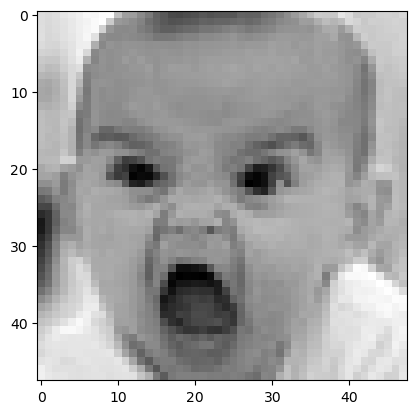

In [6]:
#Verificando se a imagem foi aolcada corretamente
plt.imshow(img_array)

In [2]:
#Atalho de diretório para treino
#Datadirectory ='Training/'
Datadirectory ='TreinoMENOR'

In [3]:
#Listas de pastas
Classes = ['0', '1', '2', '3', '4', '5', '6']

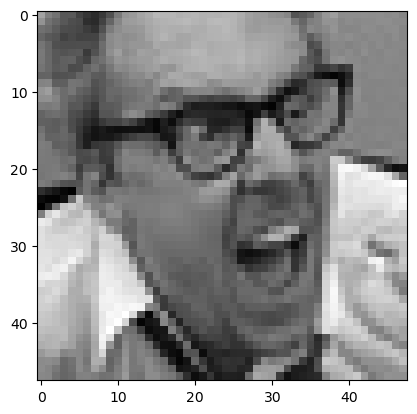

In [9]:
#Loop para leitura das imagens

for category in Classes:
    path = os.path.join(Datadirectory, category)

    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
        

In [4]:
#Mudando tamanho da imagem

img_size = 224
#new_array = cv2.resize(img_array, (img_size, img_size))
#plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
#plt.show()

In [10]:
new_array.shape

(224, 224, 3)

# Lendo todas as imagens convertendo para um array

In [10]:
dados_treinamento = []
for category in Classes:
    path = os.path.join(Datadirectory, category)

    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        dados_treinamento.append(new_array)

In [11]:
len(dados_treinamento)

139

In [5]:
training_Data = [] #Inicializando um vetor para recebimento dos dados de imagem

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num]) #APPEND SÓ ACEITA UM ARGUMENTO POSICIONAL!!! USE TUPLAS SEMPRE
            except Exception as e:
                pass


In [12]:
Datadirectory

'Training/'

In [6]:
create_training_data()

In [7]:
print(len(training_Data))

139


In [8]:
import random

random.shuffle(training_Data) #Embaralhar para que minha rede neural não aprenda de forma sequencial

In [9]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

In [10]:

images_array = np.array(X)
labels_array = np.array(y)

In [11]:
images_array = np.array(images_array).reshape(-1, img_size, img_size, 3) #Convertendo o vetor de imagens em quadridimensional

In [12]:
#print(images_array)
images_array.shape #Output com quadrimensional esperada (139, 224, 224, 3)

(139, 224, 224, 3)

In [13]:
#Agora, precisamos normalizar os dados
images_array = images_array/255.0;

In [14]:
type(labels_array.shape)

tuple

In [15]:
labels_array = np.array(labels_array)
print(labels_array.shape)

(139,)


# Criando o modelo para treinamento

OBS! Certifique-se de importar

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers

In [16]:
model = tf.keras.applications.MobileNetV2() #Modelo de pré treinamento | O modelo vai ser baixado caso executado pela primeira vez 

In [17]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [53]:
#Repare que os Output shape são mútiplos de 224. Por isso o img_size = 224

# Transferindo o modelo

In [18]:
base_input = model.layers[1].input

In [19]:
base_input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor>

In [20]:
base_output = model.layers[-2].output

In [21]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, name=keras_tensor_154>

In [22]:
final_output = layers.Dense(128)(base_output) #Adcionando uma camada depois da camada 'global average pooling'
final_output = layers.Activation('relu')(final_output) # Função de ativação 
final_output = layers.Dense(64)(final_output) 
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) #7 no primeiro argumento pois representa o número de classes


In [23]:
final_output #Shape esperado (None, 7)

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_160>

In [24]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [25]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [26]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
new_model.fit(images_array, labels_array, epochs=25)

Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.1871 - loss: 2.0342
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.6009 - loss: 1.4206
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.8639 - loss: 0.6674
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.9630 - loss: 0.2691
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.9739 - loss: 0.1197
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 63s 9s/step - accuracy: 0.9693 - loss: 0.1110
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.9224 - loss: 0.1913
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9763 - loss: 0.1133
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9389 - loss: 0.2571
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.9250 - loss: 0.1879
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 6s/step - accuracy: 0.9217 - loss: 0.2193
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.9521 - loss: 0.1638
Epoch 13/25
5

In [28]:
new_model.save('mod_my_model_94p69.h5')

In [29]:
new_model.save('mod_model.keras')

In [33]:
new_model.fit(images_array,labels_array, epochs=15)

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.9730 - loss: 0.1143
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9759 - loss: 0.0691
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - accuracy: 0.9952 - loss: 0.0356
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9689 - loss: 0.0718
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 5s/step - accuracy: 0.9191 - loss: 0.2681
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.9715 - loss: 0.1303
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.9424 - loss: 0.1487
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.9131 - loss: 0.2358
Epoch 9/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.9611 - loss: 0.1829
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.9609 - loss: 0.1250
Epoch 11/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9680 - loss: 0.1992
Epoch 12/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9518 - loss: 0.1104
Epoch 13/15
5

In [34]:
new_model.save('Final_model_97p07.h5')

In [2]:
new_model = tf.keras.models.load_model('Final_model_97p07.h5')

In [3]:
new_model.evaluate #Testando dados usando imagem em tempo real (NÃO EXECUTAR)

<bound method TensorFlowTrainer.evaluate of <Functional name=functional_1, built=True>>

In [4]:
frame = cv2.imread('happy-boy-big-smile2160.jpg')

(1440, 2160, 3)


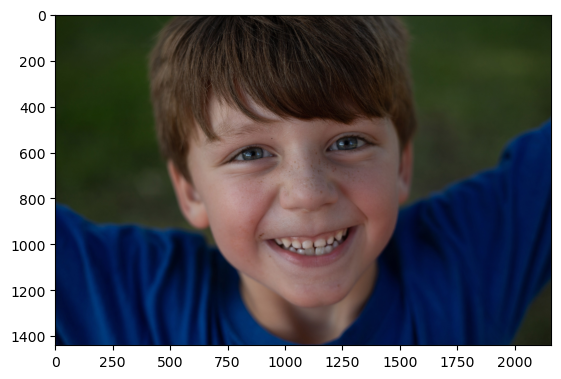

In [5]:
print(frame.shape)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
#Treinamento da Rede neural - [OK]
#Hora de colocar um agoritmo de detecção de rostos

In [7]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [8]:
#Convertendo a imagem para cinza
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
print(gray.shape)

(1440, 2160)


In [9]:
#Código apra rotular os rostos

faces = faceCascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    
    if len(facess)==0:
        print("Face não detectada")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex: ex+ew]

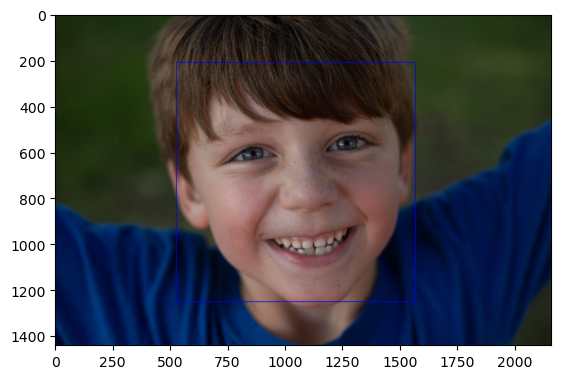

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

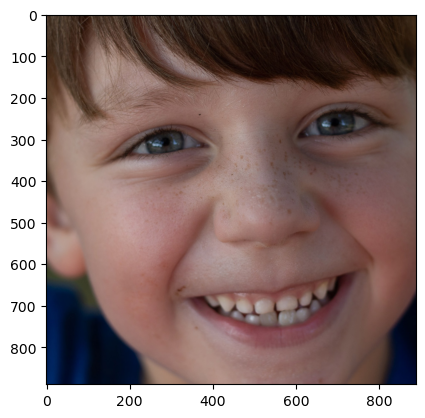

In [11]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [12]:
final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [13]:
Predictions = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [14]:
Predictions[0]

array([1.1885355e-11, 1.9476843e-15, 9.7904622e-14, 9.9548527e-17,
       5.3900703e-08, 9.9766797e-01, 2.3320075e-03], dtype=float32)

In [15]:
np.argmax(Predictions)

5

In [23]:
frame = cv2.imread('download.jpeg')
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    
    if len(facess)==0:
        print("Face não detectada")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex: ex+ew]

final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

Predictions = new_model.predict(final_image)
print(np.argmax(Predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
6


In [17]:
#Bibliotecas
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


path = 'haarcascade_frontalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

#Carregando o Modelo

new_model = tf.keras.models.load_model('Final_model_97p07.h5')
new_model.evaluate #Testando dados usando imagem em tempo real (NÃO EXECUTAR)


#Código apra rotular os rostos

faces = faceCascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    
    if len(facess)==0:
        print("Face não detectada")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex: ex+ew]

#Setando a moldura

rectangle_bgr = (255, 255, 255)
img = np.zeros((500,500))
text = "Algum texto"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width+2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(1)

#Bloco de testes para a webcam

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Não dá para a abrir a webcam")


while True:
    ret,frame = cap.read()

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray, 1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y),(x+w, y+h), (255, 0,0), 2) 
        facess  = faceCascade.detectMultiScale(roi_gray)

        if len(facess) == 0:
            print("Face não detectada")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex+ew]
    
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX



    Predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN


    if (np.argmax(Predictions)==0):
        status = 'Angry'

        x1, y1, w1, h1 = 0,0,175, 75

        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))

    elif (np.argmax(Predictions)==1):
        status = 'Disgust'

        x1, y1, w1, h1 = 0,0,175, 75

        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))

    elif (np.argmax(Predictions)==2):
        status = 'Fear'

        x1, y1, w1, h1 = 0,0,175, 75

        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))

    elif (np.argmax(Predictions)==3):
        status = 'Happy'

        x1, y1, w1, h1 = 0,0,175, 75

        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))

    elif (np.argmax(Predictions)==4):
        status = 'Sad'

        x1, y1, w1, h1 = 0,0,175, 75

        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))

    elif (np.argmax(Predictions)==5):
        status = 'Surprise'

        x1, y1, w1, h1 = 0,0,175, 75

        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))

    else:
        status = 'Neutral'

        x1, y1, w1, h1 = 0,0,175, 75

        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))

    cv2.imshow('Face Emotion Recognition', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

[ WARN:0@691.766] global cap_v4l.cpp:997 open VIDEOIO(V4L2:/dev/video1): can't open camera by index
[ERROR:0@691.865] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range


Face não detectada
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Face não detectada
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Face não detectada
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Face não detectada
Face não detectada
Face não detectada
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Face não detectada
Face não detectada
Face não detectada
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Face não detectada
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Face não detectada
Face não detectada
Face não detectada
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Face não detectada
Face não detectada
Face não detectada
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Face não detectada
Face não detectada
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Face não detectada
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63m